# Data Understanding and Data Visualization


#### Objectives


The objectives to be achieved with this notebook are as follows:

-   Explore the data to find out its characteristics or features useful for creating our Recommender System.
-   Prepare and convert the data to a more appropriate format.
-   Visualise the data in order to understand their relationships.


#### Table of contents
           
1. [Data Extraction](#de)
2. [Import Libraries](#il)
3. [Board Games Data Understanding](#bgdu)
      - [Load Data](#bgld)
      - [Data Cleaning](#bgdc)
4. [Users Data Understanding](#udu)
      - [Load Data](#uld)
      - [Data Wrangling](#udw)
      - [Data Cleaning](#udc)
5. [Data Engineering](#den) 
6. [Data Visualization](#dv)       

<a id="de"></a>

## 1. Data Extraction

For this analysis we will use two datasets. A dataset containing board games and their main characteristics. And a dataset of users whose characteristics are related to the games that each user owns and their own evaluations of those games.

The data pertaining to the games dataset have been obtained from the Board Game Geek [BGG](https://boardgamegeek.com/). The download date of the dataset is 13/06/2021, with previous dataset downloads that have been updated with this last download.


The data belonging to the user dataset has been acquired from WebScraping on a page associated with the BGG. After this process, different files were obtained, one for each user, the content of which corresponds to the data for that user only.



<a id="il"></a>

## 2. Import libraries

In [1]:
import os
import glob
import pandas as pd
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec
#import matplotlib.style as style 
import seaborn as sns
#import shutil
pd.options.display.max_columns = None

<a id="bgdu"></a>

## 3. Board Games Data Understanding

<a id="bgld"></a>

- ### Load Data

In [2]:
path='/Users/postigo/Google Drive/BoardGamesData' #Actualizar tras crear Prepair the Env
file = os.path.join(path, "bgg_GameItem.csv") 

In [3]:
dfbg=pd.read_csv(file, low_memory=False)
dfbg.head()

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,min_players_best,max_players_best,min_age,min_age_rec,min_time,max_time,category,mechanic,cooperative,compilation,compilation_of,family,implementation,integration,rank,num_votes,avg_rating,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
0,1,Die Macher,1986.0,5497,1,"12517,4959","133,2,2726,15108,39249,11652,5382,8147",3.0,5.0,4.0,5.0,5.0,5.0,14.0,14.031250,240.0,240.0,"1021,1026,1001","2916,2080,2012,2072,2040,2020",NaN,NaN,NaN,"10643,34116,91",NaN,NaN,293.0,5260.0,7.62084,1.57931,7.11936,4.3245,1.166667,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Dragonmaster,1981.0,5497,8384,12424,"64,20",3.0,4.0,3.0,4.0,3.0,4.0,12.0,NaN,30.0,30.0,"1002,1010",2009,NaN,NaN,NaN,7005,2174,NaN,3797.0,557.0,6.64398,1.44924,5.79142,1.9630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Samurai,1998.0,5497,2,11883,"17,133,267,29,7340,7335,41,2973,4617,1391,8291...",2.0,4.0,2.0,4.0,3.0,3.0,10.0,9.775862,30.0,60.0,"1009,1035","2080,2040,2026,2846,2004,2002",NaN,NaN,NaN,"10634,70711,60111,42,28732",NaN,NaN,217.0,14897.0,7.45032,1.18803,7.24102,2.4882,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Tal der Könige,1992.0,NaN,8008,2277,37,2.0,4.0,2.0,4.0,2.0,4.0,12.0,NaN,60.0,60.0,1050,"2001,2080,2012,2004",NaN,NaN,NaN,"64229,6471,11505",NaN,NaN,5082.0,338.0,6.59769,1.23454,5.68582,2.6667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Acquire,1964.0,5497,4,"12658,18317","92,5,4871,3082,858,2962,5392,4668,38,4622,7107",2.0,6.0,3.0,6.0,4.0,4.0,12.0,11.735294,90.0,90.0,"1021,1086","2040,2910,2900,2940,2005,2002,2874",NaN,NaN,NaN,4891,NaN,NaN,279.0,18323.0,7.33771,1.33505,7.14593,2.5038,1.090278,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print('Number rows and columns', dfbg.shape)

Number rows and columns (102139, 38)


In [5]:
dfbg.columns

Index(['bgg_id', 'name', 'year', 'game_type', 'designer', 'artist',
       'publisher', 'min_players', 'max_players', 'min_players_rec',
       'max_players_rec', 'min_players_best', 'max_players_best', 'min_age',
       'min_age_rec', 'min_time', 'max_time', 'category', 'mechanic',
       'cooperative', 'compilation', 'compilation_of', 'family',
       'implementation', 'integration', 'rank', 'num_votes', 'avg_rating',
       'stddev_rating', 'bayes_rating', 'complexity', 'language_dependency',
       'bga_id', 'dbpedia_id', 'luding_id', 'spielen_id', 'wikidata_id',
       'wikipedia_id'],
      dtype='object')

In [6]:
dfbg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102139 entries, 0 to 102138
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   bgg_id               102139 non-null  int64  
 1   name                 102139 non-null  object 
 2   year                 92861 non-null   float64
 3   game_type            21844 non-null   object 
 4   designer             86922 non-null   object 
 5   artist               41740 non-null   object 
 6   publisher            102122 non-null  object 
 7   min_players          100277 non-null  float64
 8   max_players          96733 non-null   float64
 9   min_players_rec      100277 non-null  float64
 10  max_players_rec      96733 non-null   float64
 11  min_players_best     100277 non-null  float64
 12  max_players_best     96733 non-null   float64
 13  min_age              79724 non-null   float64
 14  min_age_rec          926 non-null     float64
 15  min_time         

<a id="bgdc"></a>

- ### Data Cleaning

#### Quick overview of values

In [7]:
dfbg.describe(include='all')

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,min_players_best,max_players_best,min_age,min_age_rec,min_time,max_time,category,mechanic,cooperative,compilation,compilation_of,family,implementation,integration,rank,num_votes,avg_rating,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
count,102139.000000,102139,92861.000000,21844,86922,41740,102122,100277.000000,96733.000000,100277.000000,96733.000000,100277.000000,96733.000000,79724.000000,926.000000,80759.000000,8.075900e+04,100056,86596,5127.000000,765.000000,724,66485,4802,3369,20534.000000,69198.000000,69173.000000,54286.000000,20830.000000,44220.000000,792.000000,0.0,0.0,0.0,0.0,0.0,0.0
unique,NaN,97598,NaN,40,29006,19640,31955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18524,18375,NaN,NaN,712,22688,3780,2893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Grand Prix,NaN,4664,3,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1009,2035,NaN,NaN,184011,61979,258,"1421,3969,7113",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,NaN,7484,18777,3793,5631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4529,7195,NaN,NaN,3,6227,36,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,132318.408159,NaN,1999.745555,NaN,NaN,NaN,NaN,2.034863,6.680068,2.039899,6.661377,2.071681,6.637797,9.431363,9.886651,52.778266,4.892235e+02,NaN,NaN,0.992003,0.946405,NaN,NaN,NaN,NaN,10294.297020,261.024220,6.095231,1.471457,5.689666,1.925893,2.104832,NaN,NaN,NaN,NaN,NaN,NaN
std,107720.228680,NaN,71.502850,NaN,NaN,NaN,NaN,0.813397,52.152042,0.818989,52.141537,0.856972,52.142355,7.855911,2.813540,644.197627,1.058750e+05,NaN,NaN,0.089076,0.225364,NaN,NaN,NaN,NaN,5962.085524,1993.095637,1.641459,0.597274,0.368095,0.842468,1.194542,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,-3500.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.025000,1.000000,1.000000e+00,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000,0.000000,3.557130,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,29323.500000,NaN,1995.000000,NaN,NaN,NaN,NaN,2.000000,4.000000,2.000000,4.000000,2.000000,3.000000,7.000000,8.011540,15.000000,2.000000e+01,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,5133.250000,2.000000,5.129030,1.157212,5.511305,1.000000,1.012195,NaN,NaN,NaN,NaN,NaN,NaN
50%,119294.000000,NaN,2009.000000,NaN,NaN,NaN,NaN,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,10.000000,9.993243,30.000000,3.000000e+01,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,10272.500000,7.000000,6.158100,1.437805,5.548585,2.000000,1.750000,NaN,NaN,NaN,NaN,NaN,NaN
75%,225931.000000,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,6.000000,2.000000,6.000000,2.000000,6.000000,12.000000,11.957386,60.000000,6.000000e+01,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,15451.500000,45.000000,7.038460,1.726760,5.685537,2.500000,3.050833,NaN,NaN,NaN,NaN,NaN,NaN


#### Check for duplicate values

In [8]:
dfbg['bgg_id'].value_counts()

262144    1
169351    1
177539    1
173441    1
175488    1
         ..
311347    1
51250     1
315441    1
8239      1
298614    1
Name: bgg_id, Length: 102139, dtype: int64

In [9]:
dfbg['bgg_id'].duplicated().sum() 

0

In [10]:
dfbg['name'].duplicated().sum()

4541

In [11]:
dfbg[dfbg['name'].duplicated()]

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,min_players_best,max_players_best,min_age,min_age_rec,min_time,max_time,category,mechanic,cooperative,compilation,compilation_of,family,implementation,integration,rank,num_votes,avg_rating,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
594,680,Dune,1984.0,5496,7064,NaN,"1772,28",2.0,4.0,2.0,4.0,2.0,4.0,10.0,NaN,90.0,90.0,"1064,1093,1016","2014,2072,2685,2035,2686",NaN,NaN,NaN,5838,NaN,NaN,13278.0,338.0,5.75281,1.78828,5.52450,2.1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
748,859,Illuminati,1982.0,"5496,5497",22,"3737,15323",19,2.0,6.0,3.0,6.0,4.0,5.0,12.0,NaN,60.0,120.0,"1002,1093,1001,1016",2040,NaN,NaN,NaN,"65191,5828,27646,41798",NaN,NaN,3101.0,2651.0,6.19435,1.64269,5.87802,2.4842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1078,1268,What's That on My Head?,1963.0,NaN,221,NaN,"74,1064,163",3.0,6.0,3.0,6.0,3.0,6.0,NaN,NaN,60.0,60.0,1039,NaN,NaN,NaN,NaN,"65478,11111",NaN,NaN,13722.0,39.0,6.37179,1.40839,5.52159,2.2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1397,1638,Archimedes,1981.0,4666,7172,NaN,"1997,253,8896,28133,370",2.0,4.0,2.0,4.0,2.0,4.0,8.0,NaN,30.0,30.0,1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18883.0,43.0,4.88372,1.29434,5.48301,2.1667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1453,1704,Attacke,1977.0,4664,3,3,38,2.0,4.0,2.0,4.0,2.0,4.0,8.0,NaN,45.0,45.0,"1023,1019",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102074,340139,Dieci,2021.0,NaN,137060,NaN,"45386,48878",4.0,10.0,4.0,10.0,4.0,10.0,6.0,NaN,30.0,30.0,"1002,1041,1030",2685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102084,340159,Twin Cities,2021.0,NaN,136988,NaN,"45386,48878",2.0,6.0,2.0,6.0,2.0,6.0,6.0,NaN,20.0,20.0,"1002,1041,1045","3007,2047",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102093,340193,Turf War,2021.0,NaN,NaN,NaN,48804,2.0,2.0,2.0,2.0,2.0,2.0,10.0,NaN,15.0,30.0,"1002,1029","2041,2664,2901,2040,2964,2876,2940,2002,2897",NaN,NaN,NaN,"22184,8374,61979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102120,340370,Gatekeeper,2021.0,NaN,NaN,NaN,49096,2.0,8.0,2.0,8.0,2.0,8.0,12.0,NaN,30.0,120.0,"1009,1044,1017,1010,1047","2072,2850,2886,2685,2661,2028,2820,2019",NaN,NaN,NaN,"22184,59218,25158",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
dfbg[dfbg['name']=='Dune']

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,min_players_best,max_players_best,min_age,min_age_rec,min_time,max_time,category,mechanic,cooperative,compilation,compilation_of,family,implementation,integration,rank,num_votes,avg_rating,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
112,121,Dune,1979.0,"5496,5497","34,35,36","12261,11801,12433,667,12434,12432,1158","5,41,1391",2.0,6.0,4.0,6.0,6.0,6.0,12.0,13.916667,60.0,180.0,"1023,1046,1026,1093,1001,1016","2916,2080,2046,2012,2040,2961,2019,2015",NaN,NaN,NaN,"7973,5838,5679,5615,13265",NaN,NaN,323.0,5530.0,7.61616,1.69170,7.08039,3.4456,2.975,NaN,NaN,NaN,NaN,NaN,NaN
594,680,Dune,1984.0,5496,7064,NaN,"1772,28",2.0,4.0,2.0,4.0,2.0,4.0,10.0,NaN,90.0,90.0,"1064,1093,1016","2014,2072,2685,2035,2686",NaN,NaN,NaN,5838,NaN,NaN,13278.0,338.0,5.75281,1.78828,5.52450,2.1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31318,36022,Dune,2002.0,NaN,810,NaN,873,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,"1002,1093,1120,1016","2041,2072",NaN,NaN,NaN,"5838,61979",NaN,NaN,NaN,6.0,8.25000,1.57454,NaN,3.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88472,283355,Dune,2019.0,"5496,5497","34,35,36",53050,11420,2.0,6.0,5.0,6.0,6.0,6.0,14.0,NaN,120.0,120.0,"1023,1046,1026,1093,1001,1016,1019","2916,2080,2046,2012,2913,2864,2961,3006,2686,2015",NaN,NaN,NaN,"5838,13265",121,NaN,261.0,3554.0,8.13121,1.60298,7.16805,3.9274,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
dfbg[dfbg['name']=='Arma']

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,min_players_best,max_players_best,min_age,min_age_rec,min_time,max_time,category,mechanic,cooperative,compilation,compilation_of,family,implementation,integration,rank,num_votes,avg_rating,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
72643,202870,Arma,2016.0,NaN,53801,"65692,92973,92971,92972,92974,93080,92975",19114,3.0,5.0,3.0,5.0,3.0,5.0,10.0,NaN,30.0,40.0,"1002,1082",2040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,5.42857,0.903508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100088,332198,Arma,2021.0,NaN,134451,NaN,48124,2.0,4.0,2.0,4.0,2.0,4.0,6.0,NaN,5.0,45.0,"1050,1031",2860,NaN,NaN,NaN,"22184,8374",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


When checking one by one the names that appear duplicated we see that only the name is repeated, the rest of attributes are different. These games are reeditions of the original game whose author, categories or mechanics have changed with each edition, so they are considered as different games when placing the id of the game.

#### Check for null values

In [14]:
dfbg.isnull().sum()

bgg_id                      0
name                        0
year                     9278
game_type               80295
designer                15217
artist                  60399
publisher                  17
min_players              1862
max_players              5406
min_players_rec          1862
max_players_rec          5406
min_players_best         1862
max_players_best         5406
min_age                 22415
min_age_rec            101213
min_time                21380
max_time                21380
category                 2083
mechanic                15543
cooperative             97012
compilation            101374
compilation_of         101415
family                  35654
implementation          97337
integration             98770
rank                    81605
num_votes               32941
avg_rating              32966
stddev_rating           47853
bayes_rating            81309
complexity              57919
language_dependency    101347
bga_id                 102139
dbpedia_id

#### Discard columns with all null values and columns not interesting for this analysis

In [46]:
cols= ['bgg_id', 'name', 'year','designer','min_players', 'max_players','min_time', 'max_time', 'category','cooperative']
dfbg2= pd.read_csv(file,usecols= cols, low_memory=False)
dfbg2.head()

,bgg_id,name,year,designer,min_players,max_players,min_time,max_time,category,cooperative
0,1,Die Macher,1986.0,1,3.0,5.0,240.0,240.0,"1021,1026,1001",NaN
1,2,Dragonmaster,1981.0,8384,3.0,4.0,30.0,30.0,"1002,1010",NaN
2,3,Samurai,1998.0,2,2.0,4.0,30.0,60.0,"1009,1035",NaN
3,4,Tal der Könige,1992.0,8008,2.0,4.0,60.0,60.0,1050,NaN
4,5,Acquire,1964.0,4,2.0,6.0,90.0,90.0,"1021,1086",NaN


The data we will work are shown in the previous dataset. Each of the columns shows us an interesting attribute of the set of board games.</b>

   - *bgg_id* : Refers to the unique identifier of each board game set by the BGG.
   - *name* : Name of the board game
   - *year* : Year of creation of the board game
   - *designer* : Designer of the game
   - *min_players*, *max_players* : Min_players, max_players : Minimum and maximum players per game
   - *min_time*, *max_time* : Minimum and maximum playing time respectively.
   - *category* : Category of the game
   - *cooperative* : If the game is cooperative (1) or non-cooperative (0)



In [47]:
dfbg2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102139 entries, 0 to 102138
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   bgg_id       102139 non-null  int64  
 1   name         102139 non-null  object 
 2   year         92861 non-null   float64
 3   designer     86922 non-null   object 
 4   min_players  100277 non-null  float64
 5   max_players  96733 non-null   float64
 6   min_time     80759 non-null   float64
 7   max_time     80759 non-null   float64
 8   category     100056 non-null  object 
 9   cooperative  5127 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 7.8+ MB


#### Order the dataset according to the year column

In [17]:
year = dfbg2.sort_values('year', ascending=False)
year.head(50)

,bgg_id,name,year,designer,min_players,max_players,min_time,max_time,category,cooperative
100709,334632,Citytrip Antwerpen,2025.0,132082,1.0,6.0,20.0,45.0,1020,NaN
98370,325429,Citytrip Paris,2023.0,132082,1.0,6.0,20.0,45.0,1020,NaN
99421,329484,Pyramino,2023.0,111776,2.0,4.0,20.0,20.0,"1009,1082,1028",NaN
100307,333107,Red Shirts,2023.0,10254,1.0,4.0,120.0,300.0,"2710,1019",NaN
99620,330152,Nature,2023.0,3245,2.0,5.0,30.0,60.0,"1089,1002,1094,1084,1036",NaN
101211,336815,Quest Trading Card Game,2023.0,NaN,2.0,2.0,20.0,30.0,"1002,1044,1017,1010",NaN
86168,271081,Dominus,2023.0,101308,1.0,4.0,15.0,30.0,1035,NaN
95338,313065,Transmissions,2022.0,8184,1.0,4.0,45.0,60.0,NaN,NaN
87753,279876,Template of War,2022.0,"106893,97326",1.0,10.0,120.0,360.0,"1023,1017,1010,1035,1047,1093,1016,1086,1019",1.0
101834,339165,The Red Burnoose: Algeria 1857,2022.0,"108892,12374",1.0,4.0,60.0,120.0,"1094,1019",NaN


In [18]:
year['year'][year['year'].isin([2021, 2022])].count()

2999

In [19]:
# Review the games released in 2020, which is the last year completed

year['year'][year['year']==2020].count()

4627

In [20]:
# Check for negative values

year['year'][year['year']<0]

18710    -100.0
4717     -200.0
12079    -350.0
35105    -600.0
19673    -700.0
10440   -1300.0
17404   -1400.0
3361    -1400.0
67952   -1400.0
22364   -1400.0
24486   -1800.0
32800   -2000.0
2496    -2000.0
168     -2200.0
34426   -2500.0
1366    -2600.0
20175   -3000.0
2058    -3000.0
4814    -3000.0
3593    -3000.0
10285   -3000.0
2060    -3500.0
Name: year, dtype: float64

In [21]:
year['year'][year['year']<0].count()

22

In [23]:
year.tail(10)

,bgg_id,name,year,designer,min_players,max_players,min_time,max_time,category,cooperative
102044,340009,Planevo,NaN,137485,1.0,6.0,60.0,160.0,"1017,1030",NaN
102045,340010,Wortklaubereien,NaN,NaN,2.0,3.0,NaN,NaN,"1041,1028,1025",NaN
102046,340011,Dunlop Tennis-Cup,NaN,NaN,2.0,5.0,NaN,NaN,"1032,1038",NaN
102066,340104,Classic Car,NaN,NaN,1.0,6.0,NaN,NaN,"1017,1021,1026",NaN
102087,340167,Treppenlabyrinth,NaN,137528,2.0,4.0,60.0,60.0,"1009,1059,1031",NaN
102094,340197,Ein Hindernisrennen mit 6 Würfeln,NaN,NaN,2.0,7.0,NaN,NaN,1017,NaN
102102,340238,Rätsel Spaß,NaN,NaN,3.0,99.0,NaN,NaN,"1079,1027",NaN
102109,340279,No Peace Without Honor!: The Dutch War 1672-1678,NaN,10072,1.0,2.0,150.0,150.0,"2725,1019",NaN
102110,340281,1812!: War on the Great Lakes Frontier,NaN,137565,2.0,2.0,90.0,540.0,"1051,1019",NaN
102111,340282,Sniper Kill Confirmed,NaN,137567,1.0,1.0,60.0,120.0,"1069,1019",NaN


In [24]:
year['year'].isnull().sum()

9278

In 1900 the board game industry began to evolve, and in 1970 began to create games that tried to create different and more complex gaming experiences, as is the case of **Dungeons and Dragons**, or the evolution of board games, such as **The Hare and the Tortoise** by *David Parlett*, which is the first board game to win a **Spiel Des Jahres** (Game of the Year) in 1979, one of the most prestigious awards worldwide to this day. The mere fact that an award for board game of the year began to exist already gives us to understand that at that time the industry could define its criteria of what represents a board game as such.  


An important and notable difference between traditional and modern board games is the inclusion of game themes, which are not necessarily based on reality, but on fantasy and fiction, being the case of multiple examples such as **Catan**, **Carcassonne**, **Dominion** or **The Resistance**.  


**Since the objective of this TFM is the creation of a modern board game recommender. We consider 1970 as the year in which modern board games began to be created and therefore, all our analysis will focus on games created after that date.**




In [25]:
year['year'][year['year']<1970].count()

6365

In [26]:
year['year'][year['year']>=1970].count()

86496

In [27]:
year[year['year']>=1970].isnull().sum()

bgg_id             0
name               0
year               0
designer       10552
min_players      887
max_players     3357
min_time       14275
max_time       14275
category        1603
cooperative    81698
dtype: int64

In [28]:
dfbg3=dfbg2[dfbg2['year']>=1970]
dfbg3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86496 entries, 0 to 102138
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bgg_id       86496 non-null  int64  
 1   name         86496 non-null  object 
 2   year         86496 non-null  float64
 3   designer     75944 non-null  object 
 4   min_players  85609 non-null  float64
 5   max_players  83139 non-null  float64
 6   min_time     72221 non-null  float64
 7   max_time     72221 non-null  float64
 8   category     84893 non-null  object 
 9   cooperative  4798 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 7.3+ MB


In [29]:
# Change the data types
bg=dfbg3.copy()
bg['year']=bg.loc[:, 'year'].apply(np.int)
bg

,bgg_id,name,year,designer,min_players,max_players,min_time,max_time,category,cooperative
0,1,Die Macher,1986,1,3.0,5.0,240.0,240.0,"1021,1026,1001",NaN
1,2,Dragonmaster,1981,8384,3.0,4.0,30.0,30.0,"1002,1010",NaN
2,3,Samurai,1998,2,2.0,4.0,30.0,60.0,"1009,1035",NaN
3,4,Tal der Könige,1992,8008,2.0,4.0,60.0,60.0,1050,NaN
5,6,Mare Mediterraneum,1989,5,2.0,6.0,240.0,240.0,"1015,1008",NaN
...,...,...,...,...,...,...,...,...,...,...
102134,340449,Who's The C***?,2021,NaN,2.0,2.0,5.0,15.0,"1118,1030",NaN
102135,340455,King of the Valley,2021,4010,2.0,4.0,40.0,60.0,"1050,1039,1021,1119,1035,1028",NaN
102136,340465,Holiday Hijinks #3: The Pumpkin Problem,2021,61878,1.0,4.0,30.0,60.0,"1002,1039,1028",NaN
102137,340466,Unfathomable,2021,"50438,6651",3.0,6.0,120.0,240.0,"1039,1010,1024,1093",NaN


In [30]:
bg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86496 entries, 0 to 102138
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bgg_id       86496 non-null  int64  
 1   name         86496 non-null  object 
 2   year         86496 non-null  int64  
 3   designer     75944 non-null  object 
 4   min_players  85609 non-null  float64
 5   max_players  83139 non-null  float64
 6   min_time     72221 non-null  float64
 7   max_time     72221 non-null  float64
 8   category     84893 non-null  object 
 9   cooperative  4798 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 7.3+ MB


#### Display of games after 1970

In [31]:
year_num=list(bg['year'])
year_count={i:year_num.count(i) for i in year_num}
print(year_count)

{1986: 881, 1981: 612, 1998: 1074, 1992: 875, 1989: 832, 1978: 514, 1993: 803, 1997: 909, 1999: 1103, 1995: 943, 1977: 552, 1996: 878, 1994: 857, 1991: 843, 1988: 780, 1979: 557, 1984: 754, 1987: 879, 1975: 594, 1982: 574, 1980: 603, 1990: 887, 1974: 425, 1972: 350, 1983: 710, 1985: 837, 1973: 411, 2000: 1277, 2002: 1618, 1971: 261, 1976: 509, 2001: 1377, 1970: 356, 2003: 1718, 2011: 2985, 2012: 3070, 2004: 2051, 2005: 2437, 2009: 2791, 2007: 2519, 2010: 2834, 2006: 2394, 2008: 2512, 2014: 3566, 2015: 3815, 2013: 3102, 2016: 4094, 2017: 4227, 2018: 4494, 2021: 2740, 2019: 4819, 2020: 4627, 2022: 259, 2023: 6, 2025: 1}


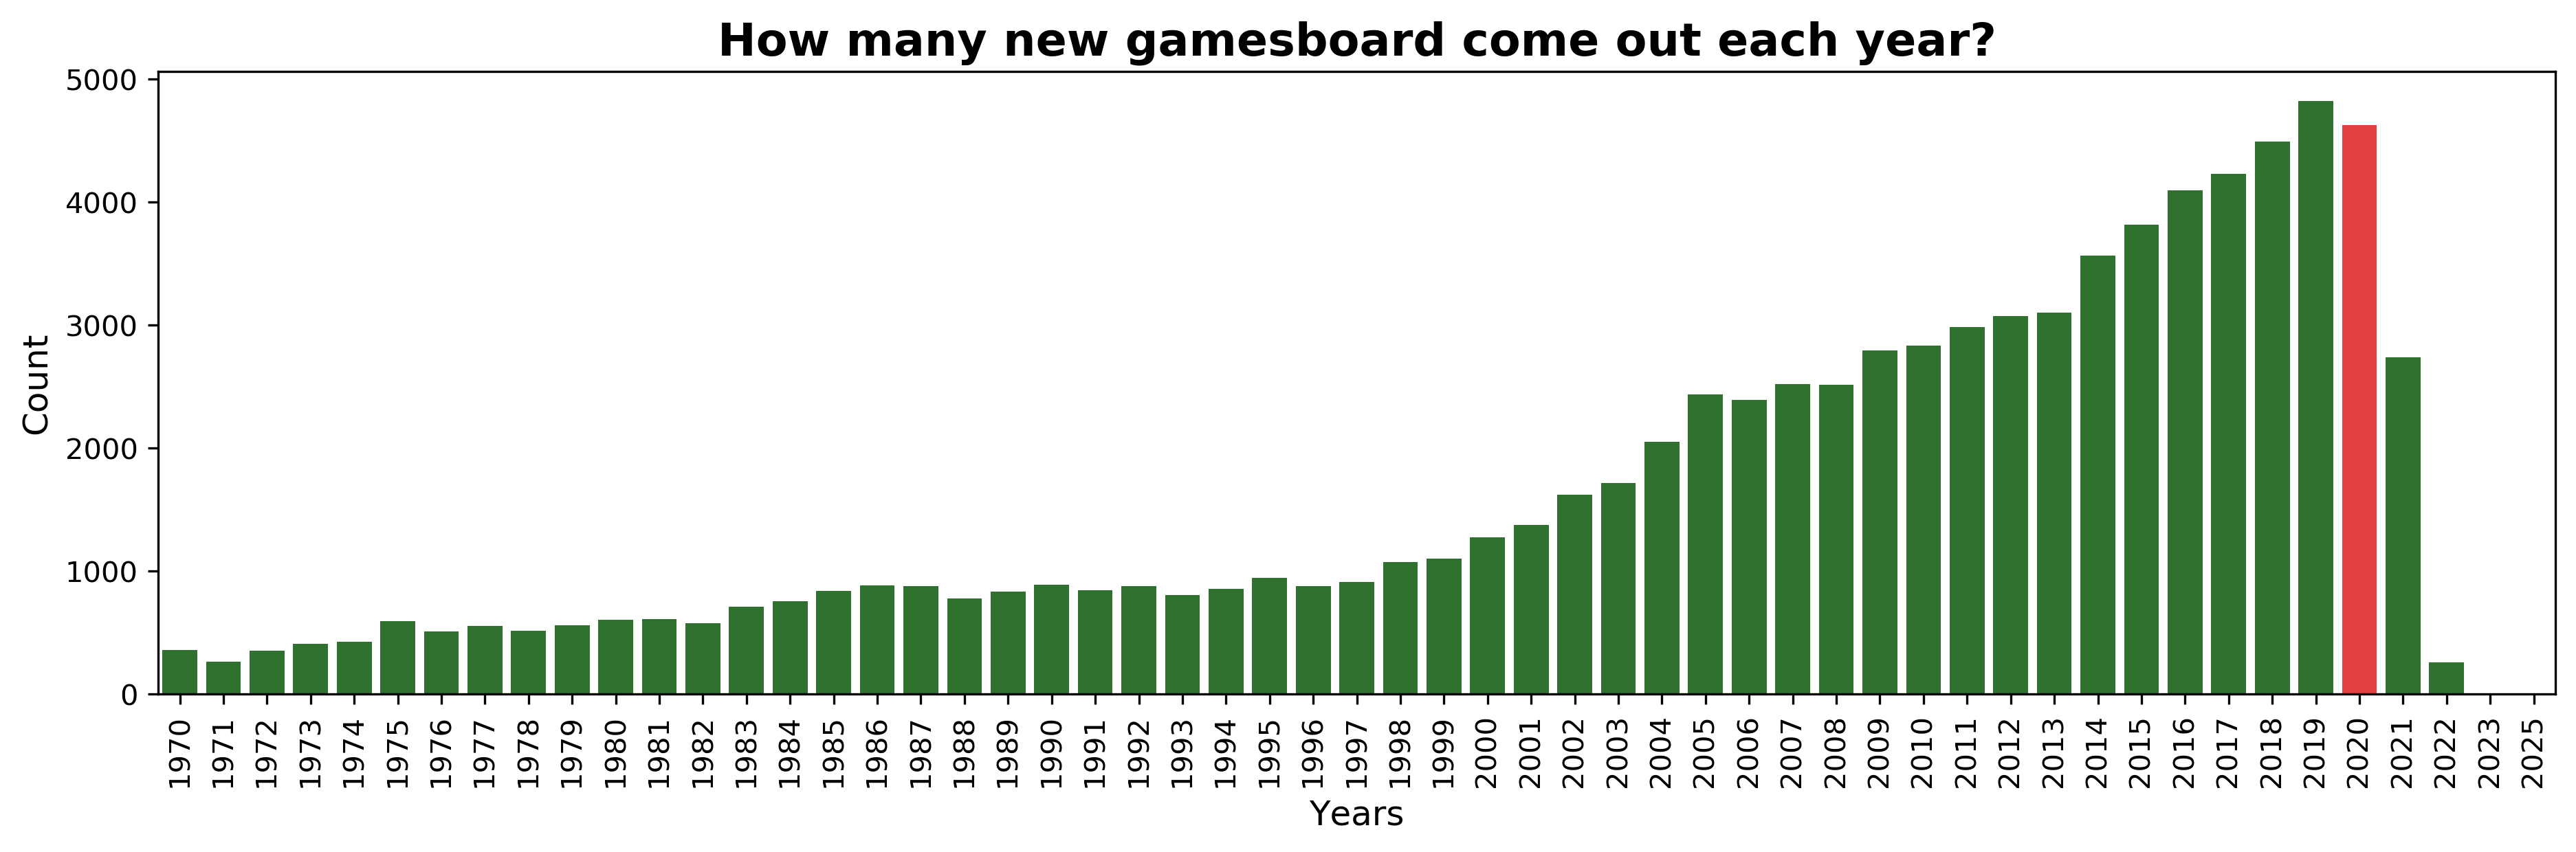

In [32]:
yy= list(year_count.values())
xy= list(year_count.keys())

fig = plt.figure(figsize=(15,4), dpi=300)
ax = fig.gca()

#sns.set_style("whitegrid")
#sns.set_context("notebook", font_scale = 1, rc={'axes.titlesize': 15})
values = np.array(yy) 
clrs = ['darkgreen' if (x < max(values)) else 'red' for x in values ]
bar=sns.barplot(x=xy, y=yy, ax=ax, palette=clrs, alpha = 0.85)
#sns.despine(left=True, bottom=True)

plt.setp(bar.get_xticklabels(), rotation=90) 
bar.set_title('How many new gamesboard come out each year?',fontdict= { 'fontsize': 16, 'fontweight':'bold'})
bar.set_xlabel('Years',fontsize = 12, )
bar.set_ylabel('Count',fontsize = 12 )
plt.show();

<a id="udu"></a>

## 4. Board Games Data Understanding

<a id="uld"></a>

- ### Load Data

In [95]:
#act_dir= os.getcwd()
%cd /users/postigo/Google Drive/BoardGamesData/users

/Users/postigo/Google Drive/BoardGamesData/users


In [96]:
# Obtain the number of users in the file
!ls | wc -l

    2853


In [97]:
# Obtain the number of records in each file
!ls | xargs wc -l > countfile.txt

In [98]:
# Read .txt data
df_countfile= pd.read_csv("countfile.txt", sep=" ", header= None, usecols=[5,6], names=['files', 'namefile'], error_bad_lines=False)
df_countfile.head()

,files,namefile
0,545,0.csv
1,489,1.csv
2,NaN,47
3,552,100.csv
4,109,1000.csv


In [99]:
# Open a user file and view the information it contains
path= "/users/postigo/Google Drive/BoardGamesData/users"

user237= pd.read_csv("237.csv")
user237

,Unnamed: 0,Game,Plays,BGG Rank,BGG Rating,Your Rating,Users Rating,Utilisation
0,0,Magic: The Gathering,182,158,7.5,10.0,32365,100.0%
1,1,Codenames,68,93,7.6,10.0,67424,99.9%
2,2,Mottainai,47,937,7.0,10.0,3486,99.9%
3,3,Innovation,44,334,7.2,10.0,14811,99.9%
4,4,Hansa Teutonica,40,139,7.6,10.0,11425,99.9%
...,...,...,...,...,...,...,...,...
212,212,Age of Steam Expansion: Germany & France,0,-1,7.9,-1.0,89,0.0%
213,213,7 Wonders Duel: Pantheon,0,-1,8.0,-1.0,8984,0.0%
214,214,1859,0,-1,6.9,8.0,25,0.0%
215,215,1844/1854,0,-1,8.0,-1.0,359,0.0%


In [100]:
user237.columns

Index(['Unnamed: 0', 'Game', 'Plays', 'BGG Rank', 'BGG Rating', 'Your Rating',
       'Users Rating', 'Utilisation'],
      dtype='object')

In [101]:
user237.shape

(217, 8)

<a id="udw"></a>

- ### Data Wrangling

#### Create a dataframe with all users and all records

In [102]:
# Merging files into a single csv

path = "/users/postigo/Google Drive/BoardGamesData/users"

all_files= glob.glob(os.path.join(path, "*.csv"))

all_df=[]
for f in all_files:
    df=pd.read_csv(f, sep=',')
    df['file'] = f.split('/')[-1]
    all_df.append(df)
    
users= pd.concat(all_df, ignore_index= True, sort=False)
users

,Unnamed: 0,Game,Plays,BGG Rank,BGG Rating,Your Rating,Users Rating,Utilisation,file,Rating,Last Played,Days Since Last Play,0,1,2,3,4,5,6
0,0,Tichu,51.0,170.0,7.6,10.0,13267.0,99.9%,545.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Admin Test Item,47.0,-1.0,7.5,3.0,25.0,99.9%,545.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Magic: The Gathering,18.0,158.0,7.5,10.0,32365.0,98.4%,545.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Agricola,16.0,31.0,7.9,10.0,63367.0,97.4%,545.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Ticket to Ride,15.0,174.0,7.4,10.0,71408.0,96.8%,545.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260891,202,Babuschka,0.0,16582.0,5.5,-1.0,50.0,0.0%,1976.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1260892,203,Automobile,0.0,459.0,7.3,8.0,5365.0,0.0%,1976.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1260893,204,Auf Achse,0.0,3149.0,6.2,6.0,1634.0,0.0%,1976.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1260894,205,Alhambra: The Vizier's Favor,0.0,-1.0,6.9,-1.0,1496.0,0.0%,1976.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
users.columns

Index(['Unnamed: 0', 'Game', 'Plays', 'BGG Rank', 'BGG Rating', 'Your Rating',
       'Users Rating', 'Utilisation', 'file', 'Rating', 'Last Played',
       'Days Since Last Play', '0', '1', '2', '3', '4', '5', '6'],
      dtype='object')

In [104]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260896 entries, 0 to 1260895
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1260896 non-null  int64  
 1   Game                  1260895 non-null  object 
 2   Plays                 1260875 non-null  float64
 3   BGG Rank              1260875 non-null  float64
 4   BGG Rating            1260875 non-null  float64
 5   Your Rating           1260875 non-null  float64
 6   Users Rating          1260875 non-null  float64
 7   Utilisation           1260875 non-null  object 
 8   file                  1260896 non-null  object 
 9   Rating                20 non-null       float64
 10  Last Played           0 non-null        float64
 11  Days Since Last Play  20 non-null       float64
 12  0                     1 non-null        object 
 13  1                     1 non-null        object 
 14  2                     1 non-null  

<a id="udc"></a>

- ### Data Cleaning

##### Remove columns with most null records and columns not interesting for this analysis

In [105]:
users.drop(columns=['Unnamed: 0', 'BGG Rank','BGG Rating','Users Rating','Rating','Last Played','Days Since Last Play',
                       '0', '1','2','3','4','5','6'], axis=1,
              inplace=True)

In [106]:
users.head()

,Game,Plays,Your Rating,Utilisation,file
0,Tichu,51.0,10.0,99.9%,545.csv
1,Admin Test Item,47.0,3.0,99.9%,545.csv
2,Magic: The Gathering,18.0,10.0,98.4%,545.csv
3,Agricola,16.0,10.0,97.4%,545.csv
4,Ticket to Ride,15.0,10.0,96.8%,545.csv


##### Set the name of the file as user id

In [107]:
file= users['file'].str.split('.', n=1, expand= True)
users.insert(0, 'u_id', file[0])
users.drop(columns =['file'], inplace= True)

In [108]:
users.head()

,u_id,Game,Plays,Your Rating,Utilisation
0,545,Tichu,51.0,10.0,99.9%
1,545,Admin Test Item,47.0,3.0,99.9%
2,545,Magic: The Gathering,18.0,10.0,98.4%
3,545,Agricola,16.0,10.0,97.4%
4,545,Ticket to Ride,15.0,10.0,96.8%


The data we will work with are shown in the dataset above. Each of the columns shows us an interesting attribute of the set of users.</b>

   - *u_id*: Unique user identifier
   - *Game*: Name of the board game
   - *Plays*: Number of games played
   - *Your Ratings*: User's rating for that game
   - *Utilisation*: Percentage of utilization of the game

In [109]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260896 entries, 0 to 1260895
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   u_id         1260896 non-null  object 
 1   Game         1260895 non-null  object 
 2   Plays        1260875 non-null  float64
 3   Your Rating  1260875 non-null  float64
 4   Utilisation  1260875 non-null  object 
dtypes: float64(2), object(3)
memory usage: 48.1+ MB


#### *u_id* column

In [110]:
#Change the data type

users['u_id']=users['u_id'].astype(int)

In [111]:
users['u_id'].max()

2851

In [112]:
# Check if u_id=0 exists

users[users['u_id']==0]

,u_id,Game,Plays,Your Rating,Utilisation
186645,0,Telestrations,26.0,7.5,99.7%
186646,0,My City,21.0,8.0,99.2%
186647,0,No Thanks!,16.0,8.5,97.4%
186648,0,Pandemic Legacy: Season 1,12.0,8.5,93.6%
186649,0,Escape: The Curse of the Temple,12.0,8.0,93.6%
...,...,...,...,...,...
187184,0,2 de Mayo,0.0,6.5,0.0%
187185,0,1830: Railways & Robber Barons,0.0,-1.0,0.0%
187186,0,Zooloretto,0.0,7.5,0.0%
187187,0,Zooloretto: Christmas Tree,0.0,-1.0,0.0%


In [113]:
users['u_id']=users['u_id']+1

In [114]:
users['u_id'].max()

2852

#### Who is the user with the highest number of board games?

In [53]:
user_num=list(users['u_id'])
user_count=users.groupby('u_id')['Game'].count()
print(user_count)

u_id
1       544
2       488
3       199
4       196
5       239
       ... 
2848    239
2849    305
2850    249
2851     41
2852    406
Name: Game, Length: 2852, dtype: int64


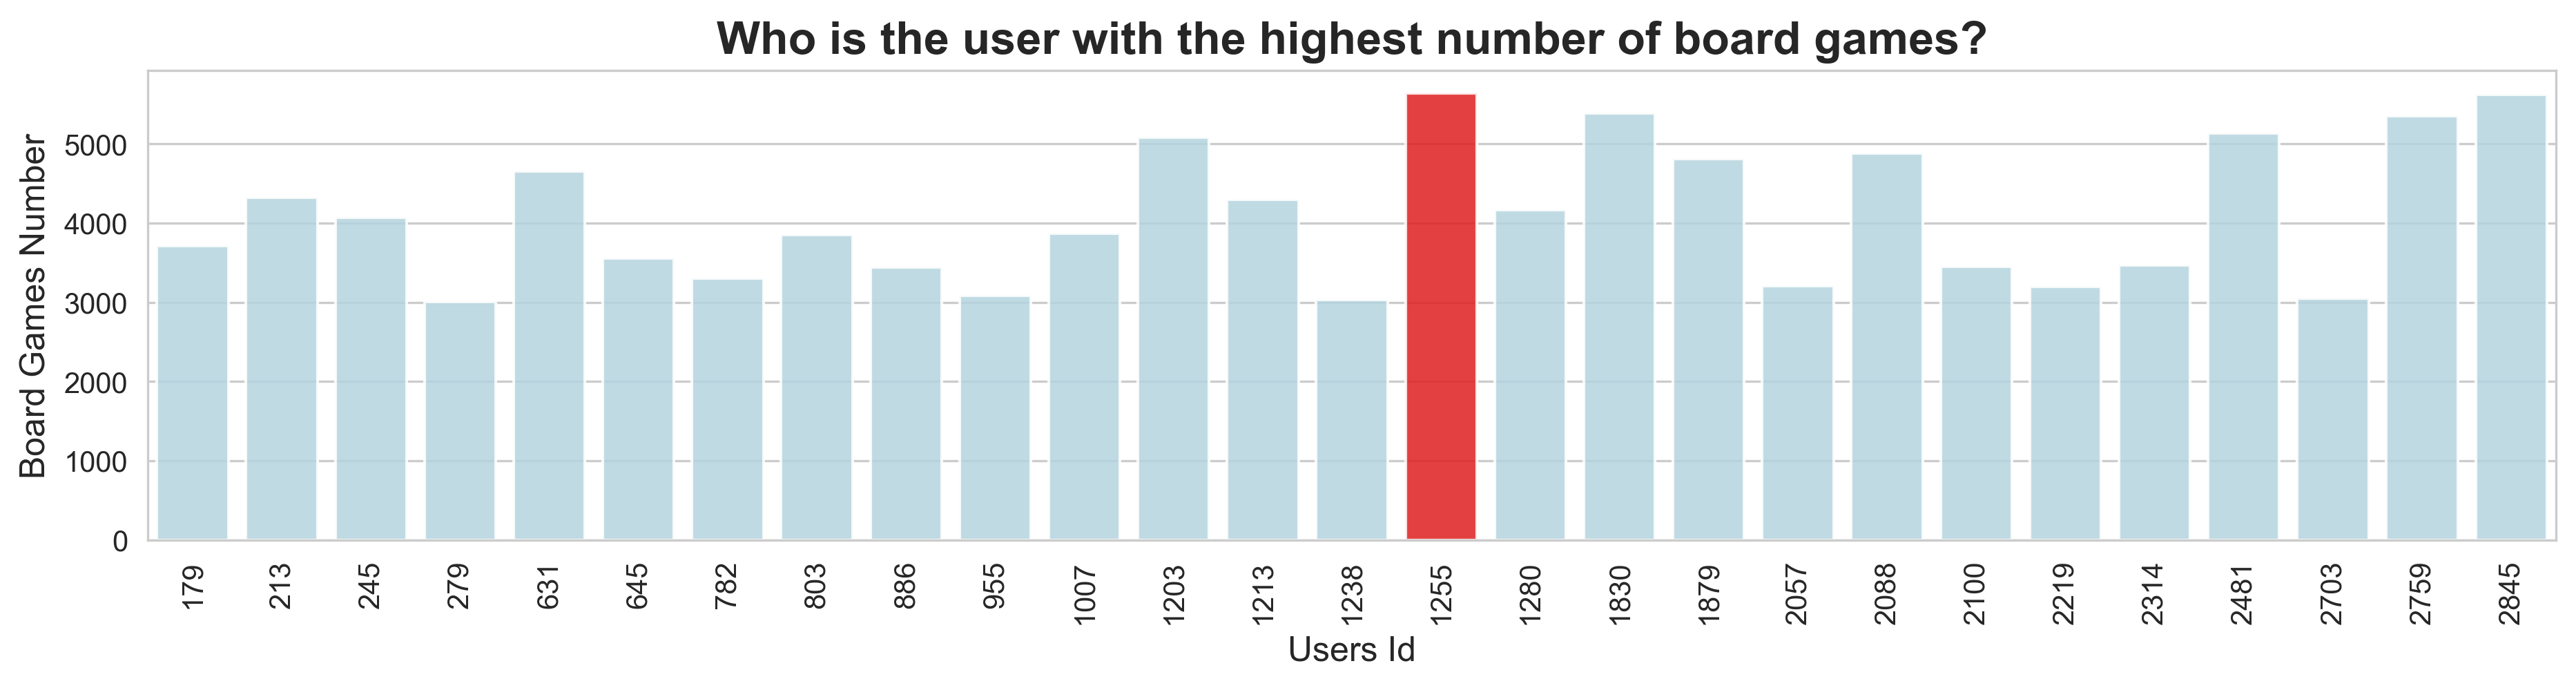

In [54]:
yy= list(user_count[user_count > 3000])
xy= list(user_count[user_count > 3000].index.values)

fig = plt.figure(figsize=(15,3), dpi=300)
ax = fig.gca()


#sns.set_style("whitegrid")
#sns.set_context("notebook", font_scale = 1, rc={'axes.titlesize': 15})
values = np.array(yy) 
clrs = ['lightblue' if (x < max(values)) else 'red' for x in values ]
bar=sns.barplot(x=xy, y=yy, ax=ax, palette=clrs, alpha = 0.85)
#sns.despine(left=True, bottom=True)

plt.setp(bar.get_xticklabels(), rotation=90) 
bar.set_title('Who is the user with the highest number of board games?',fontdict= { 'fontsize': 16, 'fontweight':'bold'})
bar.set_xlabel('Users Id',fontsize = 12, )
bar.set_ylabel('Board Games Number',fontsize = 12 )
plt.show();

#### Check for null values

In [55]:
users.isnull().sum()

u_id             0
Game             1
Plays           21
BGG Rank        21
BGG Rating      21
Your Rating     21
Users Rating    21
Utilisation     21
dtype: int64

In [56]:
users[users['Plays'].isnull()]

,u_id,Game,Plays,BGG Rank,BGG Rating,Your Rating,Users Rating,Utilisation
653918,2774,Creepers,NaN,NaN,NaN,NaN,NaN,NaN
653919,2774,Crokinole,NaN,NaN,NaN,NaN,NaN,NaN
653920,2774,Machi Koro,NaN,NaN,NaN,NaN,NaN,NaN
653921,2774,Yomi,NaN,NaN,NaN,NaN,NaN,NaN
653922,2774,ZÈRTZ,NaN,NaN,NaN,NaN,NaN,NaN
653923,2774,Kingsburg,NaN,NaN,NaN,NaN,NaN,NaN
653924,2774,Keltis: Das Orakel,NaN,NaN,NaN,NaN,NaN,NaN
653925,2774,Mystic Vale,NaN,NaN,NaN,NaN,NaN,NaN
653926,2774,Hive,NaN,NaN,NaN,NaN,NaN,NaN
653927,2774,Tao Long: The Way of the Dragon,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# Remove null values

users.dropna(axis=0, inplace=True)

In [58]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1260875 entries, 0 to 1260895
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   u_id          1260875 non-null  int64  
 1   Game          1260875 non-null  object 
 2   Plays         1260875 non-null  float64
 3   BGG Rank      1260875 non-null  float64
 4   BGG Rating    1260875 non-null  float64
 5   Your Rating   1260875 non-null  float64
 6   Users Rating  1260875 non-null  float64
 7   Utilisation   1260875 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 86.6+ MB


#### Review outliers

In [59]:
users.describe()

,u_id,Plays,BGG Rank,BGG Rating,Your Rating,Users Rating
count,1.260875e+06,1.260875e+06,1.260875e+06,1.260875e+06,1.260875e+06,1.260875e+06
mean,1.404150e+03,2.857805e+00,2.462062e+03,7.042334e+00,2.701321e+00,5.761924e+03
std,8.142236e+02,2.254360e+01,4.513049e+03,8.895329e-01,4.191426e+00,1.233732e+04
min,1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
25%,6.980000e+02,0.000000e+00,-1.000000e+00,6.600000e+00,-1.000000e+00,2.140000e+02
50%,1.375000e+03,0.000000e+00,4.350000e+02,7.100000e+00,-1.000000e+00,1.077000e+03
75%,2.088000e+03,2.000000e+00,2.523000e+03,7.600000e+00,7.000000e+00,4.949000e+03
max,2.852000e+03,6.741000e+03,2.028500e+04,1.000000e+01,1.000000e+01,1.018650e+05


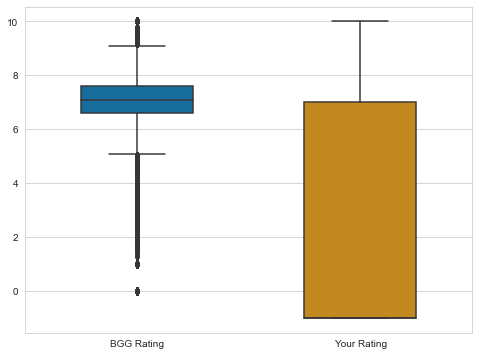

In [60]:
outl=users[['BGG Rating', 'Your Rating']]

# make boxplot with Seaborn
plt.figure(figsize=(8,6))
sns.boxplot(data=outl, width=0.5,palette="colorblind");

In [61]:
print((users['Your Rating']>=0).sum())
print((users['Your Rating']<0).sum())

567662
693213


Within the user dataframe for the columns *'BGG Rank'*, *'BGG Rating'*, *'Your Rating'* there are values of -1. 

**What do these values mean?**

These values correspond to games that have not been rated by users.
If we analyse each of the columns mentioned above we can relate this rating to:

  - For the 'BGG Rank' column, these are games that have not been rated and are not included in the BGG Rank of games.

  - For the column 'BGG Rating' these are games that have never been rated by the users of the BGG.

  - For the 'Your Rating' column, these are games that are in the user's collection, i.e. they have been purchased by the user but have not yet been rated (either because they have not yet been played or because they have not been rated).



<a id="den"></a>

## 5. Data Engineering

#### Add the bgg_id in the user df

In [62]:
bg.columns

Index(['bgg_id', 'name', 'year', 'designer', 'min_players', 'max_players',
       'min_time', 'max_time', 'category', 'cooperative'],
      dtype='object')

In [63]:
users.columns

Index(['u_id', 'Game', 'Plays', 'BGG Rank', 'BGG Rating', 'Your Rating',
       'Users Rating', 'Utilisation'],
      dtype='object')

In [64]:
result = pd.merge(users, bg[['bgg_id','name', 'year']], how='left', left_on=['Game'], right_on=['name'])
result.head()

,u_id,Game,Plays,BGG Rank,BGG Rating,Your Rating,Users Rating,Utilisation,bgg_id,name,year
0,546,Tichu,51.0,170.0,7.6,10.0,13267.0,99.9%,215.0,Tichu,1991.0
1,546,Admin Test Item,47.0,-1.0,7.5,3.0,25.0,99.9%,41047.0,Admin Test Item,2005.0
2,546,Magic: The Gathering,18.0,158.0,7.5,10.0,32365.0,98.4%,463.0,Magic: The Gathering,1993.0
3,546,Agricola,16.0,31.0,7.9,10.0,63367.0,97.4%,31260.0,Agricola,2007.0
4,546,Ticket to Ride,15.0,174.0,7.4,10.0,71408.0,96.8%,9209.0,Ticket to Ride,2004.0


In [65]:
result.sort_values('bgg_id', inplace=True)

In [66]:
result.isnull().sum()

u_id                 0
Game                 0
Plays                0
BGG Rank             0
BGG Rating           0
Your Rating          0
Users Rating         0
Utilisation          0
bgg_id          416847
name            416847
year            416847
dtype: int64

In [67]:
result.dropna(axis=0, inplace=True)

In [68]:
result.shape

(959562, 11)

In [69]:
# ¿Existen valores duplicados?
r4=result.groupby(['u_id','Game']).agg({'Game':'count'})
r4.head()

Game
u_id Game                                
1    1830: Railways & Robber Barons     1
     18AL                               1
     2 de Mayo                          1
     23                                 1
     6 nimmt!                           1

In [70]:
(r4['Game']==1).sum()

758616

In [71]:
(r4['Game']>1).sum()

84018

In [72]:
result[(result['Game']=="Aladdin's Dragons") & (result['u_id']==1)]

,u_id,Game,Plays,BGG Rank,BGG Rating,Your Rating,Users Rating,Utilisation,bgg_id,name,year
203876,1,Aladdin's Dragons,0.0,1146.0,6.9,7.5,3096.0,0.0%,492.0,Aladdin's Dragons,2000.0
203877,1,Aladdin's Dragons,0.0,1146.0,6.9,7.5,3096.0,0.0%,53103.0,Aladdin's Dragons,2009.0


In [73]:
result[(result['Game']=="Finale") & (result['u_id']==7)]

,u_id,Game,Plays,BGG Rank,BGG Rating,Your Rating,Users Rating,Utilisation,bgg_id,name,year
30885,7,Finale,0.0,11822.0,5.8,-1.0,249.0,0.0%,388.0,Finale,1998.0
30886,7,Finale,0.0,11822.0,5.8,-1.0,249.0,0.0%,20769.0,Finale,2005.0
30887,7,Finale,0.0,11822.0,5.8,-1.0,249.0,0.0%,249574.0,Finale,1999.0
30888,7,Finale,0.0,11822.0,5.8,-1.0,249.0,0.0%,259471.0,Finale,2005.0


Como se ha comentado al inicio de este notebook, no se trata de registros duplicados puesto que cada juego presentan un identificador diferente y si observamos el año, nos damos cuenta de que se trata de reediciones del mismo juego o de diferentes ediciones del juego existente. 
En el dataset de usuarios unicamente encontramos el nombre del juego. No aparece el año de edición por tanto, al establecer la unión de ambos dataset por el campo nombre, se incrementan los registros tantas veces como juegos haya con ese nombre. Como el dataset de usuarios solo especifica el nombre del juego y solamente aparece una unidad, consideraremos únicamente el primer registro en la unión y el resto los tratamos como valores duplicados.

In [74]:
#Agrupamos por 'u_id' y por 'Game'
r5=result.groupby(['u_id','Game']).first()
r5.head()

Plays  BGG Rank  BGG Rating  Your Rating  \
u_id Game                                                                       
1    1830: Railways & Robber Barons    0.0     196.0         7.9         -1.0   
     18AL                              1.0    2252.0         7.2          7.5   
     2 de Mayo                         0.0    1468.0         6.9          6.5   
     23                                1.0    4643.0         6.4          7.0   
     6 nimmt!                          6.0     597.0         6.9          7.5   

                                     Users Rating Utilisation    bgg_id  \
u_id Game                                                                 
1    1830: Railways & Robber Barons        4680.0        0.0%     421.0   
     18AL                                   678.0       20.5%    2612.0   
     2 de Mayo                             1900.0        0.0%   36522.0   
     23                                     471.0       20.5%  103651.0   
     6 nimmt!                             20527.0       74.8%     432.0   

                                                               name    year  
u_id Game                                                                    
1    1830: Railways & Robber Barons  1830: Railways & Robber Barons  1986.0  
     18AL                                                      18AL  1999.0  
     2 de Mayo                                            2 de Mayo  2008.0  
     23                                                          23  2011.0  
     6 nimmt!                                              6 nimmt!  1994.0

In [75]:
#Reseteamos el indice
r5.reset_index(inplace=True)
r5.head()

,u_id,Game,Plays,BGG Rank,BGG Rating,Your Rating,Users Rating,Utilisation,bgg_id,name,year
0,1,1830: Railways & Robber Barons,0.0,196.0,7.9,-1.0,4680.0,0.0%,421.0,1830: Railways & Robber Barons,1986.0
1,1,18AL,1.0,2252.0,7.2,7.5,678.0,20.5%,2612.0,18AL,1999.0
2,1,2 de Mayo,0.0,1468.0,6.9,6.5,1900.0,0.0%,36522.0,2 de Mayo,2008.0
3,1,23,1.0,4643.0,6.4,7.0,471.0,20.5%,103651.0,23,2011.0
4,1,6 nimmt!,6.0,597.0,6.9,7.5,20527.0,74.8%,432.0,6 nimmt!,1994.0
